# Telecom Customer Churn
This dataset comes from an Iranian telecom company, with each row representing a customer over a year period. Along with a churn label, there is information on the customers' activity, such as call failures and subscription length. 

# Dataset

In [50]:
import pandas as pd

df = pd.read_csv("customer_churn.csv")

df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


## Data Dictionary
| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complains               | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |

# All the necassary Imports

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

plt.style.use("seaborn")

# Data Validation

## Missing Values

In [52]:
df.isna().sum()

Call Failure               0
Complains                  0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

## DataTypes

In [53]:
df.dtypes

Call Failure                 int64
Complains                    int64
Subscription Length          int64
Charge Amount                int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

In [54]:
df["Age Group"] = df["Age Group"].astype("category")
df["Status"] = df["Status"].astype("category")
df["Tariff Plan"] = df["Tariff Plan"].astype("category")
df["Complains"] = df["Complains"].astype("category")

In [55]:
df.dtypes

Call Failure                  int64
Complains                  category
Subscription Length           int64
Charge Amount                 int64
Seconds of Use                int64
Frequency of use              int64
Frequency of SMS              int64
Distinct Called Numbers       int64
Age Group                  category
Tariff Plan                category
Status                     category
Age                           int64
Customer Value              float64
Churn                         int64
dtype: object

# Exploratory Data Analysis

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Call Failure             3150 non-null   int64   
 1   Complains                3150 non-null   category
 2   Subscription Length      3150 non-null   int64   
 3   Charge Amount            3150 non-null   int64   
 4   Seconds of Use           3150 non-null   int64   
 5   Frequency of use         3150 non-null   int64   
 6   Frequency of SMS         3150 non-null   int64   
 7   Distinct Called Numbers  3150 non-null   int64   
 8   Age Group                3150 non-null   category
 9   Tariff Plan              3150 non-null   category
 10  Status                   3150 non-null   category
 11  Age                      3150 non-null   int64   
 12  Customer Value           3150 non-null   float64 
 13  Churn                    3150 non-null   int64   
dtypes: categ

In [57]:
df.describe()

,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,30.998413,470.972916,0.157143
std,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,8.831095,517.015433,0.363993
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000
25%,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,25.000000,113.801250,0.000000
50%,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,30.000000,228.480000,0.000000
75%,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,30.000000,788.388750,0.000000
max,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,55.000000,2165.280000,1.000000


In [58]:
df.describe(include=["category"])

,Complains,Age Group,Tariff Plan,Status
count,3150,3150,3150,3150
unique,2,5,2,2
top,0,3,1,1
freq,2909,1425,2905,2368


## Pair Plot of numeric Variables

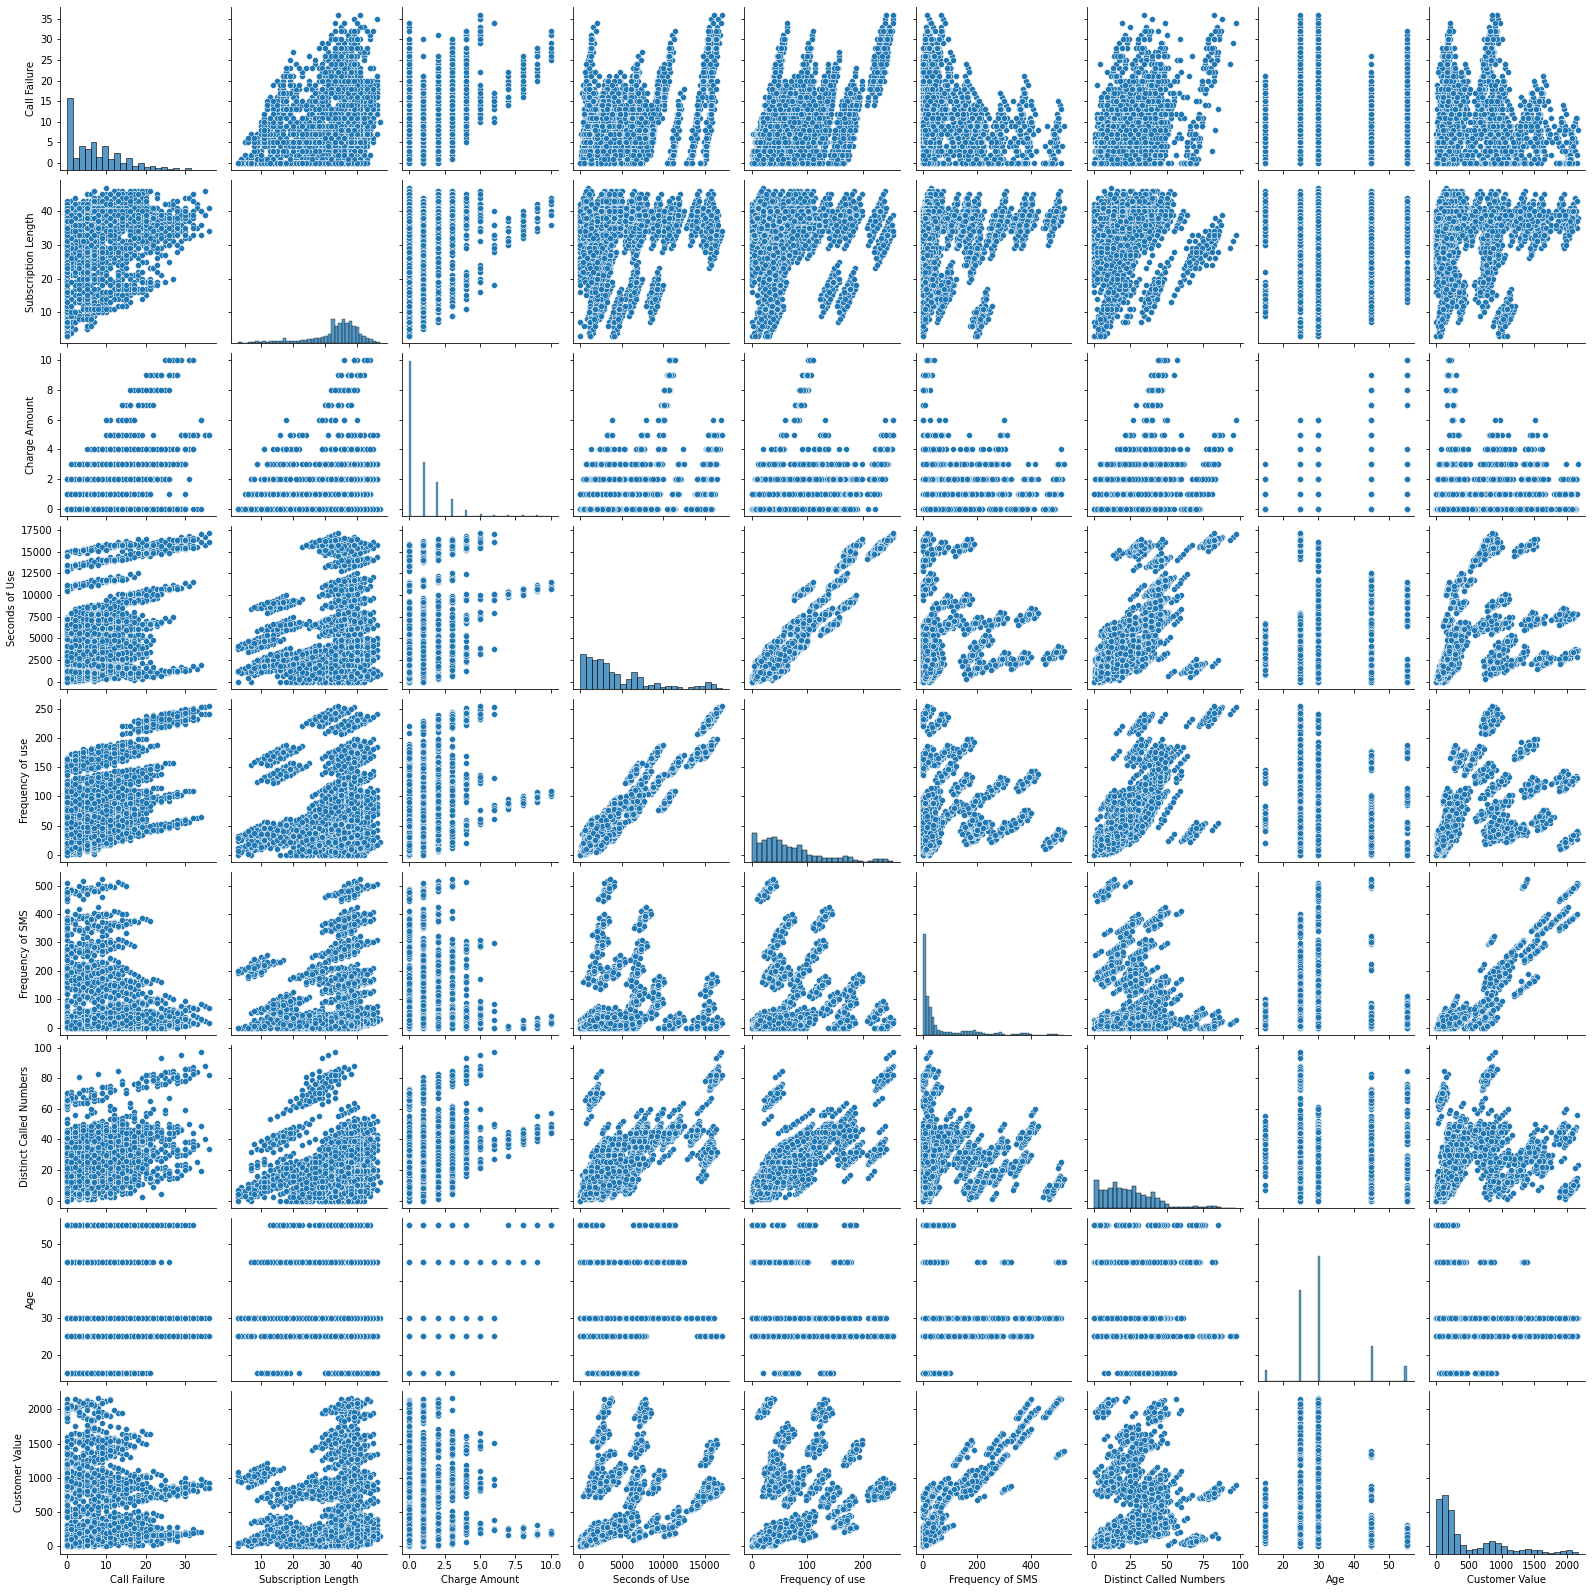

In [64]:
sns.pairplot(df.drop(columns="Churn"))
plt.show()

## Drawing Heatmap to see if there's any correlation b/w variables

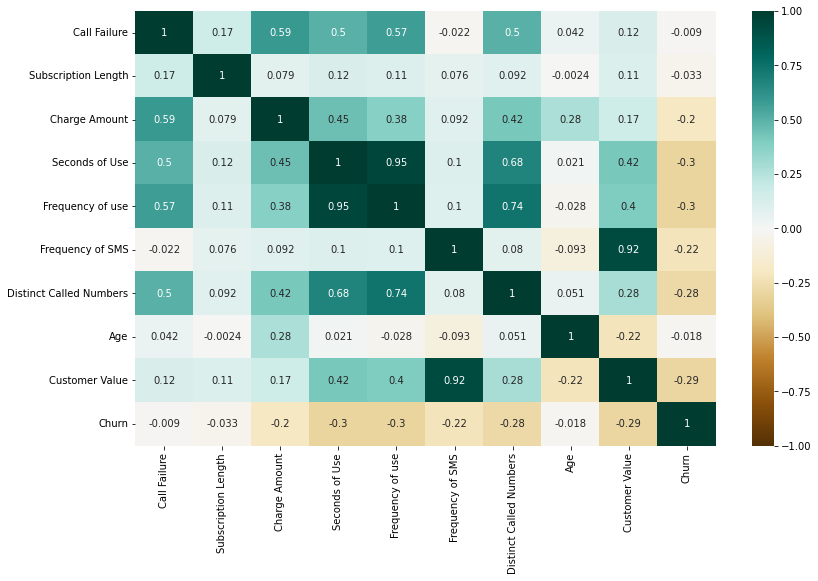

In [67]:
plt.figure(figsize=(13, 8))
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

There is a big correlation between **Frequency of use** and **Seconds of use**; and; **Frequency of SMS** and **Customer Value**.

### Frequency of use and Seconds of use

These two variables happens to 0.95 correlation very close to one

In [69]:
df[["Frequency of use", "Seconds of Use"]].head()

,Frequency of use,Seconds of Use
0,71,4370
1,5,318
2,60,2453
3,66,4198
4,58,2393


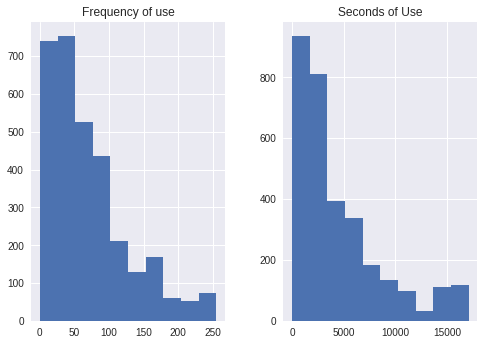

In [82]:
df[["Frequency of use", "Seconds of Use"]].hist()
plt.show()

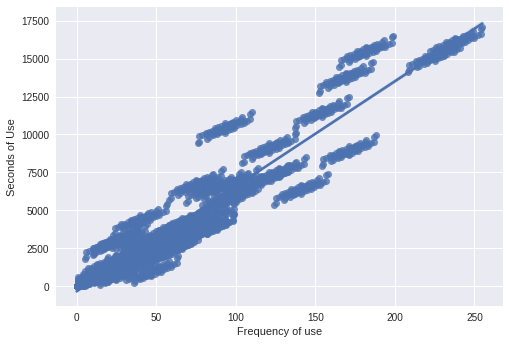

In [83]:
sns.regplot(x="Frequency of use", y="Seconds of Use", data=df)
plt.show()

### Frequency of SMS and Customer Value

These two variables happens to have a correlatio of 0.92

In [84]:
df[["Frequency of SMS", "Customer Value"]].head()

,Frequency of SMS,Customer Value
0,5,197.640
1,7,46.035
2,359,1536.520
3,1,240.020
4,2,145.805


In [85]:
df[["Frequency of SMS", "Customer Value"]].corr()

,Frequency of SMS,Customer Value
Frequency of SMS,1.000000,0.924877
Customer Value,0.924877,1.000000


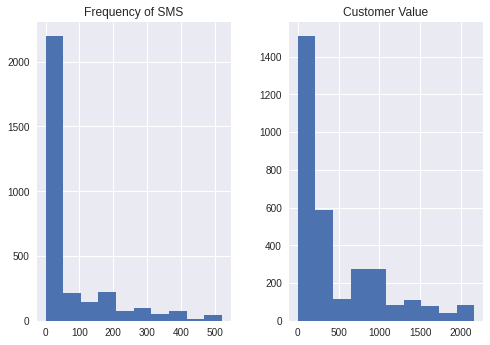

In [87]:
df[["Frequency of SMS", "Customer Value"]].hist()
plt.show()

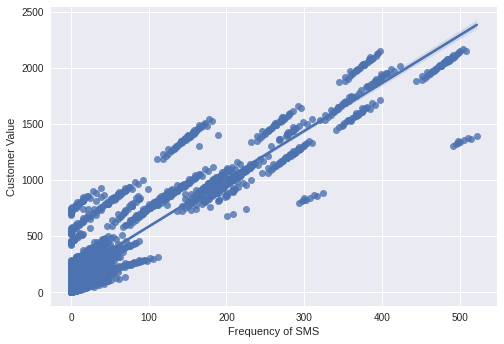

In [89]:
sns.regplot(x="Frequency of SMS", y="Customer Value", data=df)
plt.show()

## 🗺️ Exploring which age groups send more SMS messages than make phone calls?

In [127]:
grp = df.groupby("Age Group")[["Frequency of use", "Frequency of SMS"]].sum()
grp["diff"] = grp.iloc[:, 1] - grp.iloc[:, 0]
grp["diff_per"] = np.round((grp["diff"]*100)/(grp["Frequency of use"] + grp["Frequency of SMS"]))
grp

,Frequency of use,Frequency of SMS,diff,diff_per
Age Group,,,,
1,9427,2484,-6943,-58.0
2,74742,78293,3551,2.0
3,97531,128311,30780,14.0
4,23922,16611,-7311,-18.0
5,13179,4802,-8377,-47.0


The Age groups **2** and **3** send more SMS messages than make phone calls

## 📊 Creating a plot visualizing the number of distinct phone calls by age group. Within the chart, differentiate between short, medium, and long calls (by the number of seconds).

In [134]:
group = df.groupby("Age Group")[["Frequency of use", "Seconds of Use"]]\
                              .agg({"Frequency of use":np.sum, "Seconds of Use":np.mean})
group

,Frequency of use,Seconds of Use
Age Group,,
1,9427,3986.853659
2,74742,4536.344262
3,97531,4463.154386
4,23922,4042.088608
5,13179,5512.094118


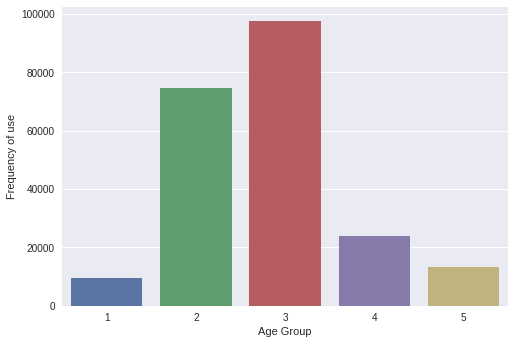

In [136]:
sns.barplot(x=group.index, y=group["Frequency of use"])
plt.show()

## 🔎 Analyzing are there significant differences between the length of phone calls between different tariff plans?

In [170]:
trf_plan_grp = df.groupby("Tariff Plan")["Seconds of Use"]
trf_plan_grp_sum = trf_plan_grp.sum()
trf_plan_grp_sum

Tariff Plan
1    12519449
2     1568799
Name: Seconds of Use, dtype: int64

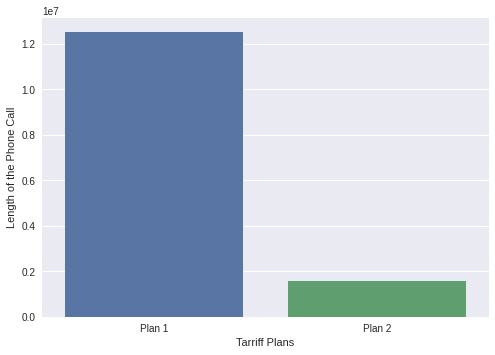

In [153]:
sns.barplot(x=["Plan 1", "Plan 2"], y=trf_plan_grp_sum)
plt.ylabel("Length of the Phone Call")
plt.xlabel("Tarriff Plans")
plt.show()

In [160]:
print("The difference between the length of phone calls between different tariff plans is"\
      ,trf_plan_grp_sum.iloc[0] - trf_plan_grp_sum.iloc[1])

The differencebetween the length of phone calls between different tariff plans is 10950650


In [187]:
a = trf_plan_grp.get_group(1).values
b = trf_plan_grp.get_group(2).values

tstats, p_value = ttest_ind(b, a)

if p_value > 0.01:
  print("No! there's no statistically significiant difference between the length of phone calls between different tariff plans")
else:
  print("Yes! there's no statistically significiant difference between the length of phone calls between different tariff plans")

Yes! there's no statistically significiant difference between the length of phone calls between different tariff plans


## Analyzing Label

In [200]:
df["Churn"].value_counts(normalize=True)

0    0.842857
1    0.157143
Name: Churn, dtype: float64

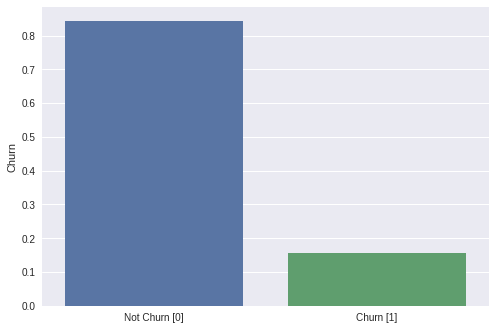

In [205]:
sns.barplot(x=["Not Churn [0]", "Churn [1]"], y=df["Churn"].value_counts(normalize=True))
plt.show()

# Model Building

## Preprocessing the data for model training

### Feature Selection based on high correlation

There is a big correlation between Frequency of use and Seconds of use of about **0.95**; and; Frequency of SMS and Customer Value of about **0.92**.



In [189]:
df[["Frequency of use", "Seconds of Use", "Frequency of SMS", "Customer Value"]].corr()

,Frequency of use,Seconds of Use,Frequency of SMS,Customer Value
Frequency of use,1.000000,0.946489,0.100019,0.401572
Seconds of Use,0.946489,1.000000,0.102123,0.415087
Frequency of SMS,0.100019,0.102123,1.000000,0.924877
Customer Value,0.401572,0.415087,0.924877,1.000000


In [195]:
df = df.drop(columns = ["Seconds of Use", "Frequency of SMS"])
df

,Call Failure,Complains,Subscription Length,Charge Amount,Frequency of use,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,71,17,3,1,1,30,197.640,0
1,0,0,39,0,5,4,2,1,2,25,46.035,0
2,10,0,37,0,60,24,3,1,1,30,1536.520,0
3,10,0,38,0,66,35,1,1,1,15,240.020,0
4,3,0,38,0,58,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,147,44,2,2,1,25,721.980,0
3146,17,0,17,1,177,42,5,1,1,55,261.210,0
3147,13,0,18,4,51,21,3,1,1,30,280.320,0
3148,7,0,11,2,46,12,3,1,1,30,1077.640,0


### Splitting data

In [196]:
X = df.drop(columns="Churn")
y = df["Churn"]

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("The shape of X_train is", X_train.shape, " and that of y_train is", y_train.shape)
print("The shape of X_test is",X_test.shape, " and that of y_test is", y_test.shape)

The shape of X_train is (2362, 11)  and that of y_train is (2362,)
The shape of X_test is (788, 11)  and that of y_test is (788,)


### Standardizing the numeric variables

In [216]:
x_train_num_cols = X_train.select_dtypes(["int", "float"]).columns

ss = StandardScaler()

X_train[x_train_num_cols] = ss.fit_transform(X_train[x_train_num_cols])

## Model Training

In [219]:
lgm = LogisticRegression(max_iter=500, random_state=42, n_jobs=-1)
lgm.fit(X_train, y_train)

LogisticRegression(max_iter=500, n_jobs=-1, random_state=42)

In [220]:
print(lgm.score(X_train, y_train))
print(lgm.score(X_test, y_test))

0.8933107535986452
0.8426395939086294


[[664   0]
 [124   0]]


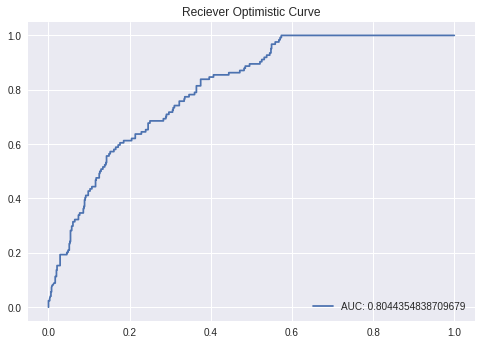

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       664
           1       0.00      0.00      0.00       124

    accuracy                           0.84       788
   macro avg       0.42      0.50      0.46       788
weighted avg       0.71      0.84      0.77       788



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [241]:
y_pred = lgm.predict(X_test)
y_pred_proba = lgm.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC: {roc_auc_score(y_test, y_pred_proba)}")
plt.title("Reciever Optimistic Curve")
plt.legend(loc=4)
plt.show()

print(classification_report(y_test, y_pred))